In [64]:
%matplotlib tk
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/jleland/Coding/Projects/flopter')
import lputils as lp
from magopter import MagnumProbes

In [65]:
data = np.load('/home/jleland/Data/Magnum/2018-06-07_Leland/neutral_pressure_scan.npy')
print(data)
print(np.shape(data))
    
pump_data = data[:, :4]
puff_data = np.concatenate([data[:, 3:4], data[:, 5:]], axis=1)

slm = 4.419412876e20

pumping = [1.0, 0.75, 0.5, 0.25]
puffing = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]) * slm
d_puffing = np.ones_like(puffing) * 0.05 * slm

[[ 2.98409969e-01  3.32163423e-01  3.94299120e-01  5.94805717e-01
   7.21091330e-01  8.84975731e-01  1.15201259e+00  1.42008734e+00
   1.68480504e+00  1.95513797e+00  2.23554206e+00  2.54933310e+00]
 [-9.95060293e+00 -9.96726603e+00 -9.95489826e+00 -9.95424000e+00
  -9.95396253e+00 -9.95379092e+00 -9.95365858e+00 -9.95349466e+00
  -9.95334269e+00 -9.95322230e+00 -9.95311131e+00 -9.95303362e+00]
 [ 6.05825000e+00  5.00001439e+00  4.87858077e+00  4.37153208e+00
   3.81651849e+00  3.81637347e+00  3.49740933e+00  3.19384970e+00
   2.70916080e+00  2.39208671e+00  2.78773279e+00  3.31032533e+02]
 [ 1.79614391e-02  1.34159114e-02  1.26824226e-02  1.69633710e-02
   4.86821211e-02  1.21408429e-02  1.02887145e-02  1.11556014e-02
   1.45966901e-02  2.85264882e-02  9.30943772e-02  3.00375757e+02]
 [ 1.08063743e+00  8.29846321e-01  7.92805565e-01  6.50245367e-01
   5.16540423e-01  5.60211564e-01  4.68852376e-01  3.59686049e-01
   2.41565039e-01  1.42511719e-01  7.43630894e-02  2.52808018e-02]
 [ 2.

In [66]:
print(np.mean(data[1]))
plt.figure()
plt.errorbar(pumping, pump_data[2, :], yerr=pump_data[3, :])

plt.figure()
plt.errorbar(puffing[:-1], puff_data[2, :-1], yerr=puff_data[3, :-1])
# plt.plot(data[0], data[2])
plt.show()

-9.954551986094675


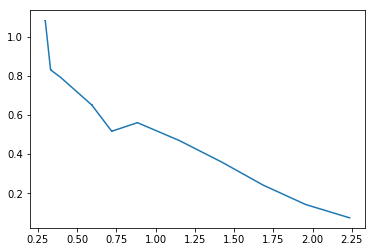

In [4]:
plt.figure()
plt.errorbar(data[0, :-1], data[4, :-1], yerr=data[5, :-1])
plt.show()

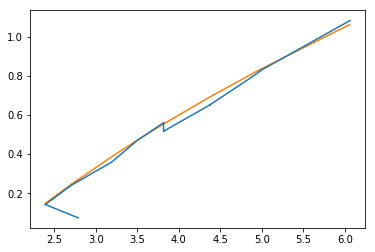

In [5]:
plt.figure()
plt.errorbar(data[2, :-1], data[4, :-1], yerr=data[5, :-1])
plt.plot(data[2, :-1], (data[2, :-1])**0.5 - 1.4)
plt.show()

In [67]:
probe_0 = MagnumProbes().probe_s

alpha = data[1]
theta_perp = np.radians(alpha)
d_theta_perp = np.radians(0.5)
A_coll_0 = probe_0.get_collection_area(theta_perp)
# d_A_coll = np.abs(probe_0.get_collection_area(theta_perp + d_theta_perp) - A_coll_0)
d_A_coll = 0.05 * A_coll_0
print(d_A_coll)
print(d_theta_perp / theta_perp)

c_s = lp.sound_speed(data[2], gamma_i=1)
d_c_s = lp.d_sound_speed(c_s, data[2], data[3])
n_e = lp.electron_density(data[4], c_s, A_coll_0)
d_n_e = lp.d_electron_density(n_e, c_s, d_c_s, A_coll_0, d_A_coll, data[4], data[5])

# PUMP & PUFF

A_coll_0_pump = A_coll_0[:4]
d_A_coll_pump = d_A_coll[:4]
c_s_pump = c_s[:4]
d_c_s_pump = d_c_s[:4]
n_e_pump = n_e[:4]
d_n_e_pump = d_n_e[:4]

A_coll_0_puff = np.concatenate([A_coll_0[3:4], A_coll_0[5:]])
d_A_coll_puff = np.concatenate([d_A_coll[3:4], d_A_coll[5:]])
c_s_puff = np.concatenate([c_s[3:4], c_s[5:]])
d_c_s_puff = np.concatenate([d_c_s[3:4], d_c_s[5:]])
n_e_puff = np.concatenate([n_e[3:4], n_e[5:]])
d_n_e_puff = np.concatenate([d_n_e[3:4], d_n_e[5:]])

[3.77663008e-06 5.75778814e-06 4.14726734e-06 4.08595204e-06
 4.06063118e-06 4.04512342e-06 4.03324314e-06 4.01862068e-06
 4.00515624e-06 3.99455270e-06 3.98482463e-06 3.97804234e-06]
[-0.05024821 -0.05016421 -0.05022653 -0.05022985 -0.05023125 -0.05023212
 -0.05023279 -0.05023361 -0.05023438 -0.05023499 -0.05023555 -0.05023594]


In [68]:
fig, ax = plt.subplots()
handle1a = plt.errorbar(pump_data[0], pump_data[2], yerr=pump_data[3], fmt='.-', color='maroon')
handle1b = plt.errorbar(puff_data[0, :-1], puff_data[2, :-1], yerr=puff_data[3, :-1], fmt='rx-')
ax.set_ylabel('Temperature (eV)')

ax2 = ax.twinx()
handle2a = plt.errorbar(pump_data[0], n_e_pump, yerr=d_n_e_pump, fmt=',-', color='midnightblue')
handle2b = plt.errorbar(puff_data[0, :-1], n_e_puff[:-1], yerr=d_n_e_puff[:-1], fmt='bx-')
handle3 = plt.axvline(x=puff_data[0, 0], linestyle='dotted', linewidth=1, color='silver')
plt.legend([handle1a, handle1b, handle2a, handle2b, handle3], 
           [r'$T_e$ - Pumping', r'$T_e$ - Puffing', r'$n_e$ - Pumping', r'$n_e$ - Puffing', 'Cutoff'])
ax2.set_ylabel(r'Density (m$^3$)')
ax.set_xlabel('Target Chamber Pressure (mTorr)')

plt.show()

In [72]:
jsat_puff = puff_data[4] / A_coll_0_puff
d_jsat_puff = np.sqrt(puff_data[5]**2 + d_A_coll_puff**2)

q_par_puff = 7 * puff_data[2] * jsat_puff
d_q_par_puff = np.abs(q_par_puff) * np.sqrt((puff_data[3]/puff_data[2])**2 + (d_jsat_puff/jsat_puff)**2)


In [73]:
plt.figure()
plt.errorbar(jsat_puff, puffing, yerr=d_puffing, xerr=d_jsat_puff)
plt.xlabel(r'$J_{sat}$ (Am$^{-2}$)')
plt.ylabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0,0.5,'Gas Puffing (particles s$^{-1}$)')

In [82]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
plt.sca(ax[0])
plt.errorbar(puffing, jsat_puff, xerr=d_puffing, yerr=d_jsat_puff)
plt.ylabel(r'$J_{sat}$ (Am$^{-2}$)')

plt.sca(ax[1])
plt.errorbar(puffing[:-1], q_par_puff[:-1], xerr=d_puffing[:-1], yerr=d_q_par_puff[:-1])
plt.ylabel(r'$q_{\parallel} ()$')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0.5,0,'Gas Puffing (particles s$^{-1}$)')

In [74]:
plt.figure()
plt.errorbar(puffing[:-1], q_par_puff[:-1], xerr=d_puffing[:-1], yerr=d_q_par_puff[:-1])
plt.ylabel(r'$q_{\parallel} ()$')
plt.xlabel(r'Gas Puffing (particles s$^{-1}$)')

Text(0.5,0,'Gas Puffing (particles s$^{-1}$)')